In [35]:
import os
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import urllib.request
from scipy.stats import spearmanr,pearsonr
import matplotlib.pyplot as plt
import cv2
import scipy
from skimage.measure import regionprops,label,regionprops_table
from skimage.filters import threshold_otsu
from skimage.morphology import (erosion, dilation, opening, closing,  # noqa
                                white_tophat)
from skimage.exposure import equalize_adapthist

from skimage.morphology import disk  # noqa
from scipy.spatial.distance import cdist

In [36]:
tadpole_location=[]

In [37]:
videoname='edge preference_test'

In [38]:
vidcap = cv2.VideoCapture(videoname+'.mp4')
success,image = vidcap.read()

mumber of circle:1


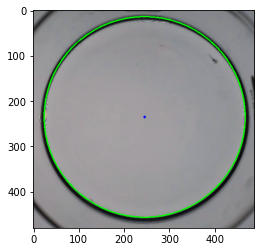

In [39]:
# Convert to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray, 
                   cv2.HOUGH_GRADIENT, dp=10, minDist=1000,minRadius = 100,
                                   maxRadius=400)#, param1 = 50,param2 = 30, minRadius = 1, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
    print(f'mumber of circle:{detected_circles[0, :].shape[0]}')
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(image, (a, b), r, (0, 255, 0), 2)
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(image, (a, b), 1, (0, 0, 255), 3)
        plt.imshow( image)
        cv2.waitKey(0)

In [40]:
a,b,r

(245, 235, 221)

get location of first spot

In [41]:
# Convert to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

        
#binarize
thresh = threshold_otsu(gray_blurred)
binary = gray_blurred >= thresh

In [42]:
### edge test
tadpole_loc_img=binary[100:150,300:415]

labeled, nr_objects = scipy.ndimage.label(tadpole_loc_img ==0) 
print("Number of objects is {}".format(nr_objects))
props =regionprops(labeled)


###edge test
tadpole_location.append([100+props[0].centroid[0], 300+props[0].centroid[1]])

Number of objects is 1


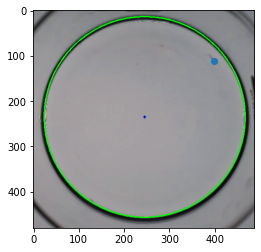

In [43]:
plt.imshow(image)
plt.scatter(tadpole_location[0][1],tadpole_location[0][0])

In [44]:
tadpole_location[0][1],tadpole_location[0][0]

(398.6, 111.28888888888889)

In [45]:
vidcap = cv2.VideoCapture(videoname+'.mp4')
success,image = vidcap.read()

thresh = threshold_otsu(gray)
binary = gray >= thresh


In [46]:
# Convert to grayscale.
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))

if videoname=='edge preference_control':
        gray_blurred=gray
        gray_blurred = equalize_adapthist(gray,kernel_size=7)

        
#binarize
thresh = threshold_otsu(gray_blurred)
binary_before = gray_blurred >= thresh


labeled_before, nr_objects__before = scipy.ndimage.label(binary_before ==0) 
#     print("Number of objects is {}".format(nr_objects))

info_table_before = pd.DataFrame(
    regionprops_table(
        labeled_before,         properties=('label', 'area'),
    )
).set_index('label') 

for indi,i in enumerate(info_table_before['area']):
    if i<100:
        labeled_before[labeled_before==info_table_before.index[indi]]=0

In [47]:

labeled_before[labeled_before>0]=1
# if videoname=='edge preference_control':
#     labeled_before = dilation(labeled_before, selem=disk(1))
    
    
labeled_before=~labeled_before



labeled_before[labeled_before==-2]=False
labeled_before[labeled_before==-1]=True

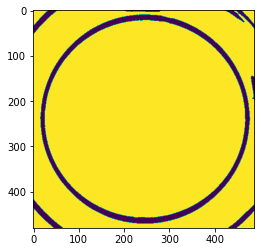

In [48]:
plt.imshow(labeled_before)

In [58]:
tadpole_location=[[111.32432432432432, 398.7567567567568]]
vidcap = cv2.VideoCapture(videoname+'.mp4')
success,image = vidcap.read()

In [59]:
# %%time
# interval=25
# count = 0
# binary_before=labeled_before
# while success:
# #     if count ==5087:
# #         break
#     success,image = vidcap.read()
#     count += 1
    

    
#     if not success:
#         break

In [60]:
success

True

In [1]:
%%time
interval=25
count = 0
binary_before=labeled_before
while success:
#     if count ==5087:
#         break

    success,image = vidcap.read()
    count += 1
    
    if videoname=='edge preference_control':
        if count >=3725 and count <3794:
            continue
        if count==3794:
            tadpole_location.append([340,390])
#             tadpole_location.append([int(previous_tadpole_loc[0]),
#                                     int(previous_tadpole_loc[1])])
            continue
    
    if not success:
        break
    previous_tadpole_loc=tadpole_location[len(tadpole_location)-1]
    
    # Convert to grayscale.
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
    # Blur using 3 * 3 kernel.
    gray_blurred = cv2.blur(gray, (3, 3))
    if videoname=='edge preference_control':
        gray_blurred=gray
        if count >=3836 and count <=3845:
            gray_blurred = equalize_adapthist(gray,kernel_size=5)
        
    #binarize
    thresh = threshold_otsu(gray_blurred)
    binary = gray_blurred >= thresh
    if count==1:
        1

    else:
        binary[binary==binary_before]=1
        
    
    tadpole_loc_img=binary[int(previous_tadpole_loc[0])-interval:int(previous_tadpole_loc[0])+interval,
                          int(previous_tadpole_loc[1])-interval:int(previous_tadpole_loc[1])+interval]
    
    labeled, nr_objects = scipy.ndimage.label(tadpole_loc_img ==0) 
#     print("Number of objects is {}".format(nr_objects))

    info_table = pd.DataFrame(
        regionprops_table(
            labeled,         properties=('label', 'centroid','area'),
        )
    ).set_index('label') 
    
    info_table=info_table.loc[info_table['area']<100,:]
    if videoname=='edge preference_control':
        info_table=info_table.loc[info_table['area']>0,:]
    else:
        info_table=info_table.loc[info_table['area']>3,:]
    
    
    if info_table.shape[0]==0:
        dapi_coord = np.argwhere(labeled>0)
        if dapi_coord.shape[0]>0:

            relative_loc=dapi_coord[np.argmin(cdist(dapi_coord,np.array([interval,interval]).reshape(1,-1))),:]
            tadpole_location.append([int(previous_tadpole_loc[0])-interval+relative_loc[0],
                                    int(previous_tadpole_loc[1])-interval+relative_loc[1]])
        else:
            tadpole_location.append([int(previous_tadpole_loc[0]),
                                    int(previous_tadpole_loc[1])])
    else:
        if videoname=='edge preference_control' and (count>=3723 and count <=3744) or (count >=3842 and count <=3845):
            relative_loc=np.array(info_table.iloc[np.argmax(info_table['area'])][['centroid-0','centroid-1']])
        else:
            info_table=info_table.drop('area',axis=1)

            if np.min(cdist(np.array(info_table),np.array([interval,interval]).reshape(1,-1)))>10:
                print(f'error at {count}!')

                print("min dist is {}".format(np.min(cdist(np.array(info_table),np.array([interval,interval]).reshape(1,-1)))))

            relative_loc = np.array(info_table)[np.argmin(cdist(np.array(info_table),np.array([interval,interval]).reshape(1,-1))),:]
#         
        tadpole_location.append([int(previous_tadpole_loc[0])-interval+relative_loc[0],
                            int(previous_tadpole_loc[1])-interval+relative_loc[1]])
plt.figure(figsize=(10,10))
plt.imshow(gray)
plt.scatter(tadpole_location[len(tadpole_location)-1][1],tadpole_location[len(tadpole_location)-1][0],c='r')


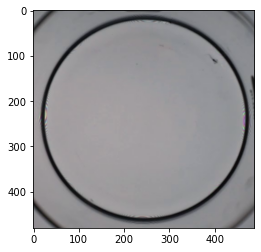

In [62]:
vidcap = cv2.VideoCapture(videoname+'.mp4')
success,image = vidcap.read()
plt.imshow(image)

In [63]:
count=0
vidcap = cv2.VideoCapture(videoname+'.mp4')
success,image = vidcap.read()

# while success:
#     success,image = vidcap.read()
#     count += 1
# #     if
#     if not success:
#         break

In [64]:
video = cv2.VideoCapture(videoname+'.mp4');

(major_ver, minor_ver, subminor_ver) = (cv2.__version__).split('.')

if int(major_ver)  < 3 :
    fps = video.get(cv2.cv.CV_CAP_PROP_FPS)
    print ("Frames per second uacsing video.get(cv2.cv.CV_CAP_PROP_FPS): {0}".format(fps))
else :
    fps = video.get(cv2.CAP_PROP_FPS)
    print ("Frames per second using video.get(cv2.CAP_PROP_FPS) : {0}".format(fps))
video.release()


Frames per second using video.get(cv2.CAP_PROP_FPS) : 29.97002997002997


120s,3612 frames

Text(0.5, 1.0, 'edge preference_test')

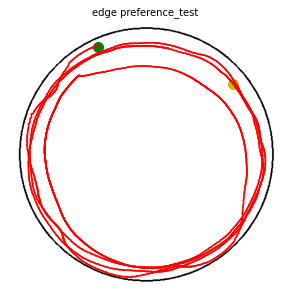

In [65]:
plt.figure(figsize=(5,5))

# image_b=np.zeros(image.shape)+255
image[:]=255
cv2.circle(image, (a, b), r+2, (0, 0, 0), 2)
plt.imshow(image)
for i in range(0, len(tadpole_location)):
    plt.plot(np.array(tadpole_location)[i:i+2,1],np.array(tadpole_location)[i:i+2,0],c='r')
# plt.scatter(np.array(tadpole_location)[:,1],np.array(tadpole_location)[:,0],s=1,c='r')
plt.scatter(tadpole_location[0][1],tadpole_location[0][0],c='y',s=100)
plt.scatter(tadpole_location[len(tadpole_location)-1][1],tadpole_location[len(tadpole_location)-1][0],c='g',s=100)
plt.axis('off')
plt.title(videoname,fontsize=10)

r=6cm,1pixel  =    6/rcm      =       6/r*10 mm

In [66]:
1/fps

0.03336666666666667

In [67]:
tadpole_location_smooth=tadpole_location
tadpole_location_smoothold=tadpole_location_smooth.copy()

In [79]:
tadpole_location_smooth=[tadpole_location_smoothold[i] for i in np.arange(0,len(tadpole_location_smoothold),3)]
tadpole_location=tadpole_location_smooth

In [80]:
from scipy.spatial import distance
speed_value=[]
for i in range(len(tadpole_location)-1):
    speed_value.append( distance.euclidean(np.array(tadpole_location[i]), np.array(tadpole_location[i+1])) *6/r*10*fps/3)
#     break

In [81]:
max(speed_value)

40.18579993563632

In [82]:
cluster_pl=sns.color_palette("rainbow", 1001)

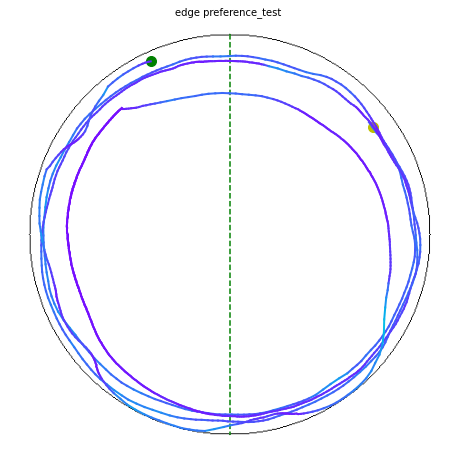

In [83]:
plt.figure(figsize=(8,8))
maxspeed=147.24
tadpole_location_smooth=tadpole_location
# image_b=np.zeros(image.shape)+255
image[:]=255
cv2.circle(image, (a, b), r, (0, 0, 0), 1)
plt.imshow(image)
plt.plot((a,a),(b-r,b+r),linestyle='--',c='g')
for i in range(0,len(tadpole_location_smooth)-1):
    plt.plot(np.array(tadpole_location_smooth)[i:i+2,1],np.array(tadpole_location_smooth)[i:i+2,0],
             color=list(cluster_pl[int(speed_value[i]/maxspeed*1000)]),linewidth=2)
    

# for i in range(1080, len(tadpole_location_smooth)-1):
#     plt.plot(np.array(tadpole_location_smooth)[i:i+2,1],np.array(tadpole_location_smooth)[i:i+2,0],
#             color=list(cluster_pl[1000-int(speed_value[i]/maxspeed*1000)]),linewidth=2)

    # plt.scatter(np.array(tadpole_location_smooth)[:,1],np.array(tadpole_location_smooth)[:,0],s=10,c='r')

# plt.scatter(np.array(tadpole_location_smooth)[:,1],np.array(tadpole_location_smooth)[:,0],s=1,c='r')
plt.scatter(tadpole_location[1][1],tadpole_location[1][0],c='y',s=100)
plt.scatter(tadpole_location[len(tadpole_location)-1][1],tadpole_location[len(tadpole_location)-1][0],c='g',s=100)
plt.axis('off')
plt.title(videoname,fontsize=10)

plt.savefig(f"{videoname}.pdf")
plt.show()

In [ ]:
dis=[]
import math
for i in range(len(tadpole_location_smooth)):

    dis.append(math.sqrt((b-tadpole_location_smooth[i][0])*(b-tadpole_location_smooth[i][0])+(a-tadpole_location_smooth[i][1])*(a-tadpole_location_smooth[i][1])))

In [ ]:
test=pd.read_csv('edge preference_control_dis.csv')
testdis=test['0']

In [ ]:
plt.plot(np.array(range(len(dis)))/fps,np.array(dis)*6/r*10,'r')
plt.plot(np.array(range(len(testdis)))/fps,np.array(testdis)*6/175*10,'b')

plt.ylim([0,60])

plt.xlim([0,125])
plt.ylabel('Distance of tadpole and center (mm)')
plt.xlabel('Time (s)')
plt.savefig("fig3g_edgepreference.pdf")
